# 6. Selenium을 활용한 웹크롤러 만들기 - 1

![banner](../image/4-1.jpg)

## 웹이란 무엇일까요?

> 웹은 ‘월드 와이드 웹(World Wide Web)’의 줄임말이에요. 첫 글자를 따서 WWW라고 부르기도 합니다. ‘웹(web)’을 영어 뜻 그대로 풀이하면 ‘거미줄’이라는 뜻인데, 거미줄처럼 서로 연결된 모습을 상상하면 딱 알맞는 용어겠죠?

> 웹은 뼈대를 이루는 html, 꾸며주기를 담당하는 css, 동작을 담당하는 javascript로 이루어져 있어요. 이를 실제로 살펴볼까요? Chrome 브라우져에서 오른쪽 버튼을 눌러 검사 옵션에 들어가보세요.

![banner](../image/4-4.jpg)

> 오른쪽에서 첫번째 Elements 창이 보이시나요? 보고계신 내용이 웹페이지의 뼈대를 이루는 html문서에요. 보는것 처럼 html은 태그(tag)를 활용해서 만들어졌으며 이를 어려운말로 마크업언어(Markup language)라고 합니다. 두번째 창에 보면 웹페이지를 꾸며주는 css를 확인할수 있고 Source 탭을 누르면 웹페이지의 작동을 관리하는 javascript를 확인해볼수 있어요.

![banner](../image/4-3.jpg)

## 웹의 구조

> 아래 그림은 모델-뷰-컨트롤러(Model–View–Controller, MVC) 패턴을 보여줘요. MCV패턴은 소프트웨어 공학에서 사용되는 소프트웨어 디자인 패턴을 말해요

![banner](../image/4-5.jpg)

> 먼저 사용자(Client)에서 서버(Server)로 정보제공을 요청합니다. 이를 요청(Request)라고 해요. Request의 방식은 GET방식과 POST방식이 있어요.

> GET방식은 url 뒤에 붙여서 서버로 보내는 방식이에요. `?` 뒤에 값이 이어붙는 방식이죠. 이 때문에 보내는 값을 볼수 있을뿐만 아니라 많은 데이터를 보내기엔 적합하지 않습니다. 그래서 일반적으로 데이터를 주고받기보다는 서버에 요청후 데이터를 받을때 주로 사용해요.

> POST방식은 GET방식과 달리 숨겨진 형태로 서버에 전송할때 보내는 방식이에요. 때문에 상대적으로 GET방식에 비해선 많은 데이터를 보낼수 있고, 값이 보여지지 않기때문에 주로 로그인을 할때 서버로 정보를 보내기 위해 사용하는 방식이에요. 

> 서버가 요청을 받으면 사용자에게 보내기 위해 데이터베이스(Model)로 부터 값을 받고 `html`과 `css`, 그리고 `javscript`를 이용해서 `Component`를 만들어서 사용자에게 보내줘요. 물론 데이터만 보내는것도 가능해요. 이럴땐 주로 사전형(`dict`)으로 생긴 `json`형태로 값을 보내준답니다.

> 이런 과정을 통해 여러분은 웹사이트에 있는 내용을 보게 되는거에요!

![banner](../image/4-6.jpg)

## 웹크롤러란 무엇일까요?

> 웹 크롤러(web crawler)는 조직적, 자동화된 방법으로 월드 와이드 웹을 탐색하는 컴퓨터 프로그램입니다. 검색엔진의 경우는 자료의 최신화를 위해서 사용하기도 하고 주로 정보수집을 위해 활용하고 있어요.

> 정식 명칭은 'Web Scraping'이라고 하며 영어로 자료를 찾으실때는 해당 명칭을 활용하는게 좋아요.

## 네이버 부동산 크롤링 하기

![banner_example1](../image/4-2.jpg)

### 한페이지 크롤링

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from pandas import DataFrame

In [2]:
# 페이지(page) 부분을 수정하여 다름 페이지로 넘어갈 수 있어요
url = 'https://land.naver.com/article/divisionInfo.nhn?rletTypeCd=A01&tradeTypeCd=B2\
&hscpTypeCd=A01%3AA03%3AA04&cortarNo=4211000000&articleOrderCode=&cpId=&minPrc=&\
maxPrc=&minWrrnt=&maxWrrnt=&minLease=&maxLease=&minSpc=&maxSpc=&subDist=&mviDate=&\
hsehCnt=&rltrId=&mnex=&siteOrderCode=&cmplYn=&page={}&location=2339#_content_list_target'.format(1)

문자열 자료형의 format함수를 이용하면 편해요!

In [3]:
page = urlopen(url) # 파라미터로 data에 값을 넣어 보내면 post방식으로 통신할 수 있어요
page

In [4]:
# BeautifulSoup를 이용해서 HTTPResponse를 보기좋게 파싱(parsing)할 수 있어요
soup = BeautifulSoup(page, 'html.parser')

In [5]:
# row 값을 가져오기 위한 tbody값 선택
tbody = soup.select('.sale_list > tbody > tr')

In [6]:
import re

# 공백 문자 제거
pattern = re.compile(r'\s+')

위에는 처음보는 함수죠? re 패키지를 사용하면 정규식을 활용해 문자열을 다룰수 있어요. 하나만 더 새로운걸 배워볼까요?

반복문을 활용하면서 값과 인덱스를 동시에 쓰고싶으신적이 많죠? 방법을 알려드릴께요!

In [7]:
리스트 = ['첫번째값', '두번째값', '세번째값', '네번째값', '다섯번째값']
for 인덱스, 값 in enumerate(리스트):
    print(인덱스, ': ',값)

0 :  첫번째값
1 :  두번째값
2 :  세번째값
3 :  네번째값
4 :  다섯번째값


`enumerate`를 활용하면 리스트에 있는 값과 인덱스를 튜플(`tuple`)형태로 반환해요

진짜 마직막 하나만 더 해봐요!

`zip`함수는 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수에요 직접 볼까요?

In [8]:
리스트_2 = ['사과', '딸기', '포도', '배', '사과']
합리스트 = list(zip(리스트, 리스트_2))
합리스트

[('첫번째값', '사과'),
 ('두번째값', '딸기'),
 ('세번째값', '포도'),
 ('네번째값', '배'),
 ('다섯번째값', '사과')]

In [9]:
# 위에껄 다 합치면 이런식을 사용할수도 있겠죠?
for 인덱스, (값순서, 값) in enumerate(zip(리스트, 리스트_2)):
    print(인덱스, 값순서, 값)

0 첫번째값 사과
1 두번째값 딸기
2 세번째값 포도
3 네번째값 배
4 다섯번째값 사과


<img src="../image/4-7.jpg" alt="Drawing" style="width: 200px;"/>

큼.... 너무 뜬금없이 너무 길어졌군요....

자 계속 해봅시다!

In [10]:
rows = []
for i, tr in enumerate(tbody):
    if i%2 != 0:
        continue
    row = []
    for i, td in enumerate(tr.select('td')):
        if i == 3:
            if td.select('img'): 
                continue
        row.append(re.sub(pattern,'', td.text))
    rows.append(row)

In [11]:
from pandas import DataFrame

df = DataFrame.from_records(rows, columns=['거래', '종류', '확인일자', '매물명', '면적(㎡)', '층', '매물가(만원)', '연락처'])
df.tail(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처
25,월세,아파트,18.10.30.,퇴계주공2단지네이버부동산에서보기,81A/59공급면적81.27㎡전용면적59.99㎡,17/18,"2,000/45",미래로공인중개사033-263-0014
26,월세,아파트,18.10.29.,보배온의네이버부동산에서보기,147/126공급면적147.81㎡전용면적126.57㎡,3/13,"3,000/60",e편한춘천부동산공인중개사사무소033-264-7979
27,월세,아파트,18.11.01.,롯데인벤스네이버부동산에서보기,114/84공급면적114.06㎡전용면적84.93㎡,3/15,"2,000/6018.11.01.자호가일뿐실거래가로확인된금액이아닙니다.",우두롯데공인중개사사무소033-253-8289
28,월세,아파트,18.10.29.,세경1차네이버부동산에서보기,62/51공급면적62.39㎡전용면적51.62㎡,1/5,700/40,왕공인중개사무소033-910-9898
29,월세,아파트,18.10.29.,청구네이버부동산에서보기,79A/59공급면적79.33㎡전용면적59.96㎡,3/12,"1,000/55",장학부동산공인중개사사무소033-243-4980


In [12]:
# 매물명에서 '네이버부동산에서보기' 제거
df['매물명'] = df['매물명'].apply(lambda x : x.replace('네이버부동산에서보기', ''))
df.tail(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처
25,월세,아파트,18.10.30.,퇴계주공2단지,81A/59공급면적81.27㎡전용면적59.99㎡,17/18,"2,000/45",미래로공인중개사033-263-0014
26,월세,아파트,18.10.29.,보배온의,147/126공급면적147.81㎡전용면적126.57㎡,3/13,"3,000/60",e편한춘천부동산공인중개사사무소033-264-7979
27,월세,아파트,18.11.01.,롯데인벤스,114/84공급면적114.06㎡전용면적84.93㎡,3/15,"2,000/6018.11.01.자호가일뿐실거래가로확인된금액이아닙니다.",우두롯데공인중개사사무소033-253-8289
28,월세,아파트,18.10.29.,세경1차,62/51공급면적62.39㎡전용면적51.62㎡,1/5,700/40,왕공인중개사무소033-910-9898
29,월세,아파트,18.10.29.,청구,79A/59공급면적79.33㎡전용면적59.96㎡,3/12,"1,000/55",장학부동산공인중개사사무소033-243-4980


In [13]:
df[df['매물가(만원)'] == '3,000/9018.10.01.자호가일뿐실거래가로확인된금액이아닙니다.']

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처


In [14]:
droplist = []
for i, row in enumerate(df.iterrows()):
    if '실거래가로확인된금액이아닙니다' in row[1]['매물가(만원)']:
        droplist.append(i)

df = df.drop(droplist, axis=0)
df.head(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처
0,월세,아파트,18.11.07.,석사3지구부영,82/59공급면적82.7㎡전용면적59.76㎡,1/14,"1,000/40",황금부동산공인중개사사무소033-264-5566
1,월세,아파트,18.11.06.,춘천두산위브,108A/84공급면적108.73㎡전용면적84.98㎡,2/15,"2,000/65",두산공인중개사사무소033-241-8959
2,월세,아파트,18.11.06.,세경2차,60/55공급면적60.9㎡전용면적55.26㎡,1/5,"1,000/28",최강부동산공인중개사사무소033-251-6778
3,월세,아파트,18.11.06.,현진,77/59공급면적77.98㎡전용면적59.94㎡,7/13,"1,000/50",가화부동산공인중개사사무소033-253-4500
4,월세,아파트,18.11.06.,석사주공2단지,78/58공급면적78.98㎡전용면적58.14㎡,13/15,"1,500/40",나래공인중개사사무소033-255-8947


In [15]:
#'/'로 split후에 천단위 쉼표제거 후 정수형변환
df['매물가(보증금)'] = df['매물가(만원)'].apply(lambda x: float(x.split('/')[0].replace(',','')))
df['매물가(월세)'] = df['매물가(만원)'].apply(lambda x: float(x.split('/')[1].replace(',','')))

df.head(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처,매물가(보증금),매물가(월세)
0,월세,아파트,18.11.07.,석사3지구부영,82/59공급면적82.7㎡전용면적59.76㎡,1/14,"1,000/40",황금부동산공인중개사사무소033-264-5566,1000.0,40.0
1,월세,아파트,18.11.06.,춘천두산위브,108A/84공급면적108.73㎡전용면적84.98㎡,2/15,"2,000/65",두산공인중개사사무소033-241-8959,2000.0,65.0
2,월세,아파트,18.11.06.,세경2차,60/55공급면적60.9㎡전용면적55.26㎡,1/5,"1,000/28",최강부동산공인중개사사무소033-251-6778,1000.0,28.0
3,월세,아파트,18.11.06.,현진,77/59공급면적77.98㎡전용면적59.94㎡,7/13,"1,000/50",가화부동산공인중개사사무소033-253-4500,1000.0,50.0
4,월세,아파트,18.11.06.,석사주공2단지,78/58공급면적78.98㎡전용면적58.14㎡,13/15,"1,500/40",나래공인중개사사무소033-255-8947,1500.0,40.0


In [16]:
df = df.drop('매물가(만원)', 1)
df.head(5)

,거래,종류,확인일자,매물명,면적(㎡),층,연락처,매물가(보증금),매물가(월세)
0,월세,아파트,18.11.07.,석사3지구부영,82/59공급면적82.7㎡전용면적59.76㎡,1/14,황금부동산공인중개사사무소033-264-5566,1000.0,40.0
1,월세,아파트,18.11.06.,춘천두산위브,108A/84공급면적108.73㎡전용면적84.98㎡,2/15,두산공인중개사사무소033-241-8959,2000.0,65.0
2,월세,아파트,18.11.06.,세경2차,60/55공급면적60.9㎡전용면적55.26㎡,1/5,최강부동산공인중개사사무소033-251-6778,1000.0,28.0
3,월세,아파트,18.11.06.,현진,77/59공급면적77.98㎡전용면적59.94㎡,7/13,가화부동산공인중개사사무소033-253-4500,1000.0,50.0
4,월세,아파트,18.11.06.,석사주공2단지,78/58공급면적78.98㎡전용면적58.14㎡,13/15,나래공인중개사사무소033-255-8947,1500.0,40.0


## 여러 페이지 크롤링

아직 객체에 대해서 다루지 않았어요! 본 예제는 참고로만 확인해보세요

### 모듈화

In [17]:
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
from pandas import DataFrame

class Crawler:
    def __init__(self):
        self.pattern = re.compile(r'\s+')
        self.columns = ['거래', '종류', '확인일자', '매물명', '면적(㎡)', '층', '매물가(보증금)', '매물가(월세)', '연락처']
        self.rows = []
    
    def _make_rows(self, url):
        page = urlopen(url)
        soup = BeautifulSoup(page, 'html.parser')
        tbody = soup.select('.sale_list > tbody > tr')
        for i, tr in enumerate(tbody):
            if i%2 != 0: # 예외 로우 제거
                continue
            # 섬네일 이미지가 포함되지 않은 row
            if len(tr.select('td')) == 8:
                row = []
                for i, td in enumerate(tr.select('td')):
                    if i == 6: # 매물가 int형으로 변경
                        try:
                            price = td.text.replace(',', '')
                            for p in price.split('/'):
                                row.append(int(p))
                        except:
                            row.append(None)
                    else:
                        row.append(re.sub(self.pattern,'', td.text))
            # 섬네일 이미지가 포함된 row
            else:
                row = []
                for i, td in enumerate(tr.select('td')):
                    if i == 6:
                        continue
                    if i == 7: # 매물가 int형으로 변경
                        try:
                            price = td.text.replace(',', '')
                            for p in price.split('/'):
                                row.append(int(p))
                        except:
                            row.append(None)
                    else:
                        row.append(re.sub(self.pattern,'', td.text))
                        
            self.rows.append(row)
            
    def crawling(self, pages=2):
        # 테이블 로우
        for page in range(1, pages):
            self._make_rows('https://land.naver.com/article/divisionInfo.nhn?rletTypeCd=A01&tradeTypeCd=B2&hscpTypeCd=A01%3AA03%3AA04&cortarNo=4211000000&articleOrderCode=&cpId=&minPrc=&maxPrc=&minWrrnt=&maxWrrnt=&minLease=&maxLease=&minSpc=&maxSpc=&subDist=&mviDate=&hsehCnt=&rltrId=&mnex=&siteOrderCode=&cmplYn=&page={}&location=2339#_content_list_target'.format(page))
        df = DataFrame.from_records(self.rows, columns=self.columns)
        return df

In [18]:
crawler = Crawler()
dataset = crawler.crawling(10)

In [19]:
print("데이터 크기: {}".format(len(dataset)))
dataset.head(5)

데이터 크기: 171


,거래,종류,확인일자,매물명,면적(㎡),층,매물가(보증금),매물가(월세),연락처
0,월세,아파트,18.11.07.,석사3지구부영네이버부동산에서보기,82/59공급면적82.7㎡전용면적59.76㎡,1/14,1000.0,40.0,황금부동산공인중개사사무소033-264-5566
1,월세,아파트,18.11.06.,춘천두산위브네이버부동산에서보기,108A/84공급면적108.73㎡전용면적84.98㎡,2/15,2000.0,65.0,두산공인중개사사무소033-241-8959
2,월세,아파트,18.11.06.,세경2차네이버부동산에서보기,60/55공급면적60.9㎡전용면적55.26㎡,1/5,1000.0,28.0,최강부동산공인중개사사무소033-251-6778
3,월세,아파트,18.11.06.,현진네이버부동산에서보기,77/59공급면적77.98㎡전용면적59.94㎡,7/13,1000.0,50.0,가화부동산공인중개사사무소033-253-4500
4,월세,아파트,18.11.06.,석사주공2단지네이버부동산에서보기,78/58공급면적78.98㎡전용면적58.14㎡,13/15,1500.0,40.0,나래공인중개사사무소033-255-8947


### None값 제거

In [20]:
dataset = dataset.dropna()
print("데이터 크기: {}".format(len(dataset)))

데이터 크기: 155


In [21]:
# 매물명의 '네이버부동산에서보기' 제거
dataset['매물명'] = dataset['매물명'].apply(lambda x:x.replace('네이버부동산에서보기', ''))
dataset.head(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(보증금),매물가(월세),연락처
0,월세,아파트,18.11.07.,석사3지구부영,82/59공급면적82.7㎡전용면적59.76㎡,1/14,1000.0,40.0,황금부동산공인중개사사무소033-264-5566
1,월세,아파트,18.11.06.,춘천두산위브,108A/84공급면적108.73㎡전용면적84.98㎡,2/15,2000.0,65.0,두산공인중개사사무소033-241-8959
2,월세,아파트,18.11.06.,세경2차,60/55공급면적60.9㎡전용면적55.26㎡,1/5,1000.0,28.0,최강부동산공인중개사사무소033-251-6778
3,월세,아파트,18.11.06.,현진,77/59공급면적77.98㎡전용면적59.94㎡,7/13,1000.0,50.0,가화부동산공인중개사사무소033-253-4500
4,월세,아파트,18.11.06.,석사주공2단지,78/58공급면적78.98㎡전용면적58.14㎡,13/15,1500.0,40.0,나래공인중개사사무소033-255-8947


### 시각화

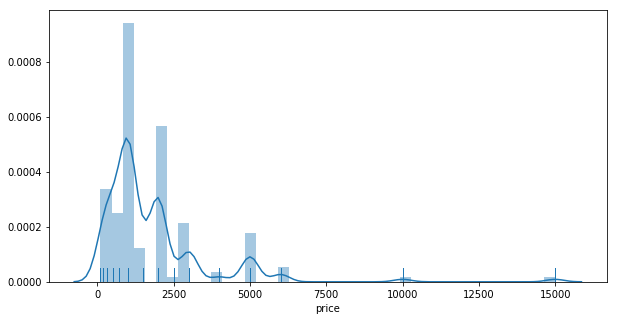

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
fig = sns.distplot(dataset['매물가(보증금)'], rug=True, axlabel='price', norm_hist=True)
plt.show(fig)
plt.clf()

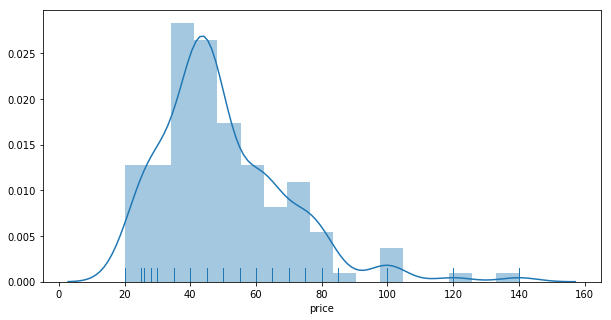

In [23]:
plt.figure(figsize=(10, 5))
fig = sns.distplot(dataset['매물가(월세)'], rug=True, axlabel='price')
plt.show(fig)
plt.clf()